# Explore here

Airbnb en Nueva York
Una empresa ha recolectado la información del alquiler de viviendas en Nueva York a través de la aplicación Airbnb durante el año 2019. Este conjunto de datos se utilizó para entrenar modelos de Machine Learning durante ese año, en una competición en abierto.

Ahora lo utilizaremos para llevar a cabo un estudio acerca de las variables que componen el dataset a fin de comprenderlo y obtener conclusiones sobre él.

Paso 1: Carga del conjunto de datos
Puedes descargar el conjunto de datos directamente desde Kaggle.com o en el siguiente enlace: https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv. Almacena los datos en crudo en la carpeta ./data/raw.

Paso 2: Realiza un EDA completo
Este paso es vital para asegurar que nos quedamos con las variables estrictamente necesarias y eliminamos las que no son relevantes o no aportan información. Utiliza el Notebook de ejemplo que trabajamos y adáptalo a este caso de uso.

Asegúrate de dividir convenientemente el conjunto de datos en train y test como hemos visto en la lección.

Paso 3: Guarda el conjunto de datos procesado
Después del EDA puedes guardar los datos en la carpeta ./data/processed. Asegúrate de agregar la carpeta de los datos en el .gitignore. Los datos al igual que los modelos no se deben subir a git.

In [1]:
# Your code here
import pandas as pd

airbhb_csv = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")


airbhb_csv.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
airbhb_csv.shape

(48895, 16)

In [3]:
airbhb_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

* Hay 48895 filas que corresponden a las viviendas de Airbnb en Nueva York, y 16 columnas de información de cada uno
* La columna de ultima revisión y la de revisones por mes cuentan con muchos mas valores nulos que el esto de columnas que a lo mucho llegan a 21 nulos. En cambio estas dos columnas tienen valores nulos que llegan a los 10000
* Los datos cuentan con 10 características numéricas (incluyendo columnas de id) y 6 características categóricas.

In [4]:
airbhb_csv.drop("id", axis = 1).duplicated().sum()

np.int64(0)

In [5]:
airbhb_csv = airbhb_csv.drop_duplicates(subset = airbhb_csv.columns.difference(['id']))
print(airbhb_csv.shape)
airbhb_csv.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
if airbhb_csv.duplicated().sum():
    airbhb_csv = airbhb_csv.drop_duplicates()
print(airbhb_csv.shape)
airbhb_csv.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Eliminar información irrelevante**

In [7]:
airbhb_csv.drop(["id", "name", "host_id", "host_name", "neighbourhood","last_review", "reviews_per_month"], axis = 1, inplace = True)
airbhb_csv.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


**Análisis sobre variables categóricas**

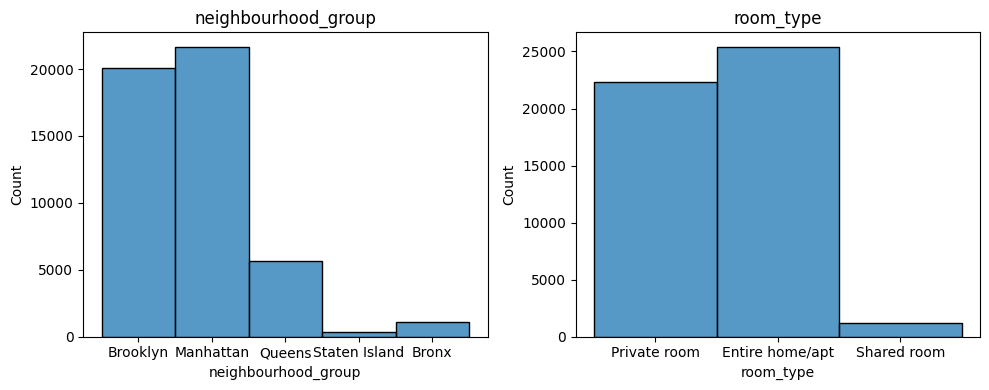

In [8]:
import math
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

info_data = airbhb_csv.dtypes
categorical_column = [col for col in info_data.index if info_data[col] == "object" or info_data[col] == "category"]

# Ajustes para la visualización de filas y columnas de gráficos
n = len(categorical_column)
n_cols = 2
n_rows = math.ceil(n / n_cols)

fig, axis = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows))

# Ajustar que el axis siempre sea 2D
axis = np.array(axis)
if axis.ndim == 1:
    axis = axis.reshape(-1, n_cols)


for index, name_col in enumerate(categorical_column):
    r, c = divmod(index, n_cols)
    sns.histplot(ax = axis[r, c], data=airbhb_csv, x = name_col)
    axis[r, c].set_title(name_col)


plt.tight_layout()
plt.show()

* **Grupo de vecindad**
  * La mayoría de los alojamientos están en Manhattan, seguido de Brooklyn. 
  * Estas areas superan aproximadamente 3 veces mas que la área de Queens, que es la tercera en popularidad.
  * Hay pocas propiedades en Staten Island y Bronx, lo que indica que estas áreas son menos populares para los turistas o viajeros.

* **Tipo de habitación**
  * La mayoría de los alojamientos son casas enteras o apartamentos completos, seguidos de habitaciones privadas.
  * Una pequeña cantidad de alojamientos son habitaciones compartidas.


**Análisis sobre variables numericas**

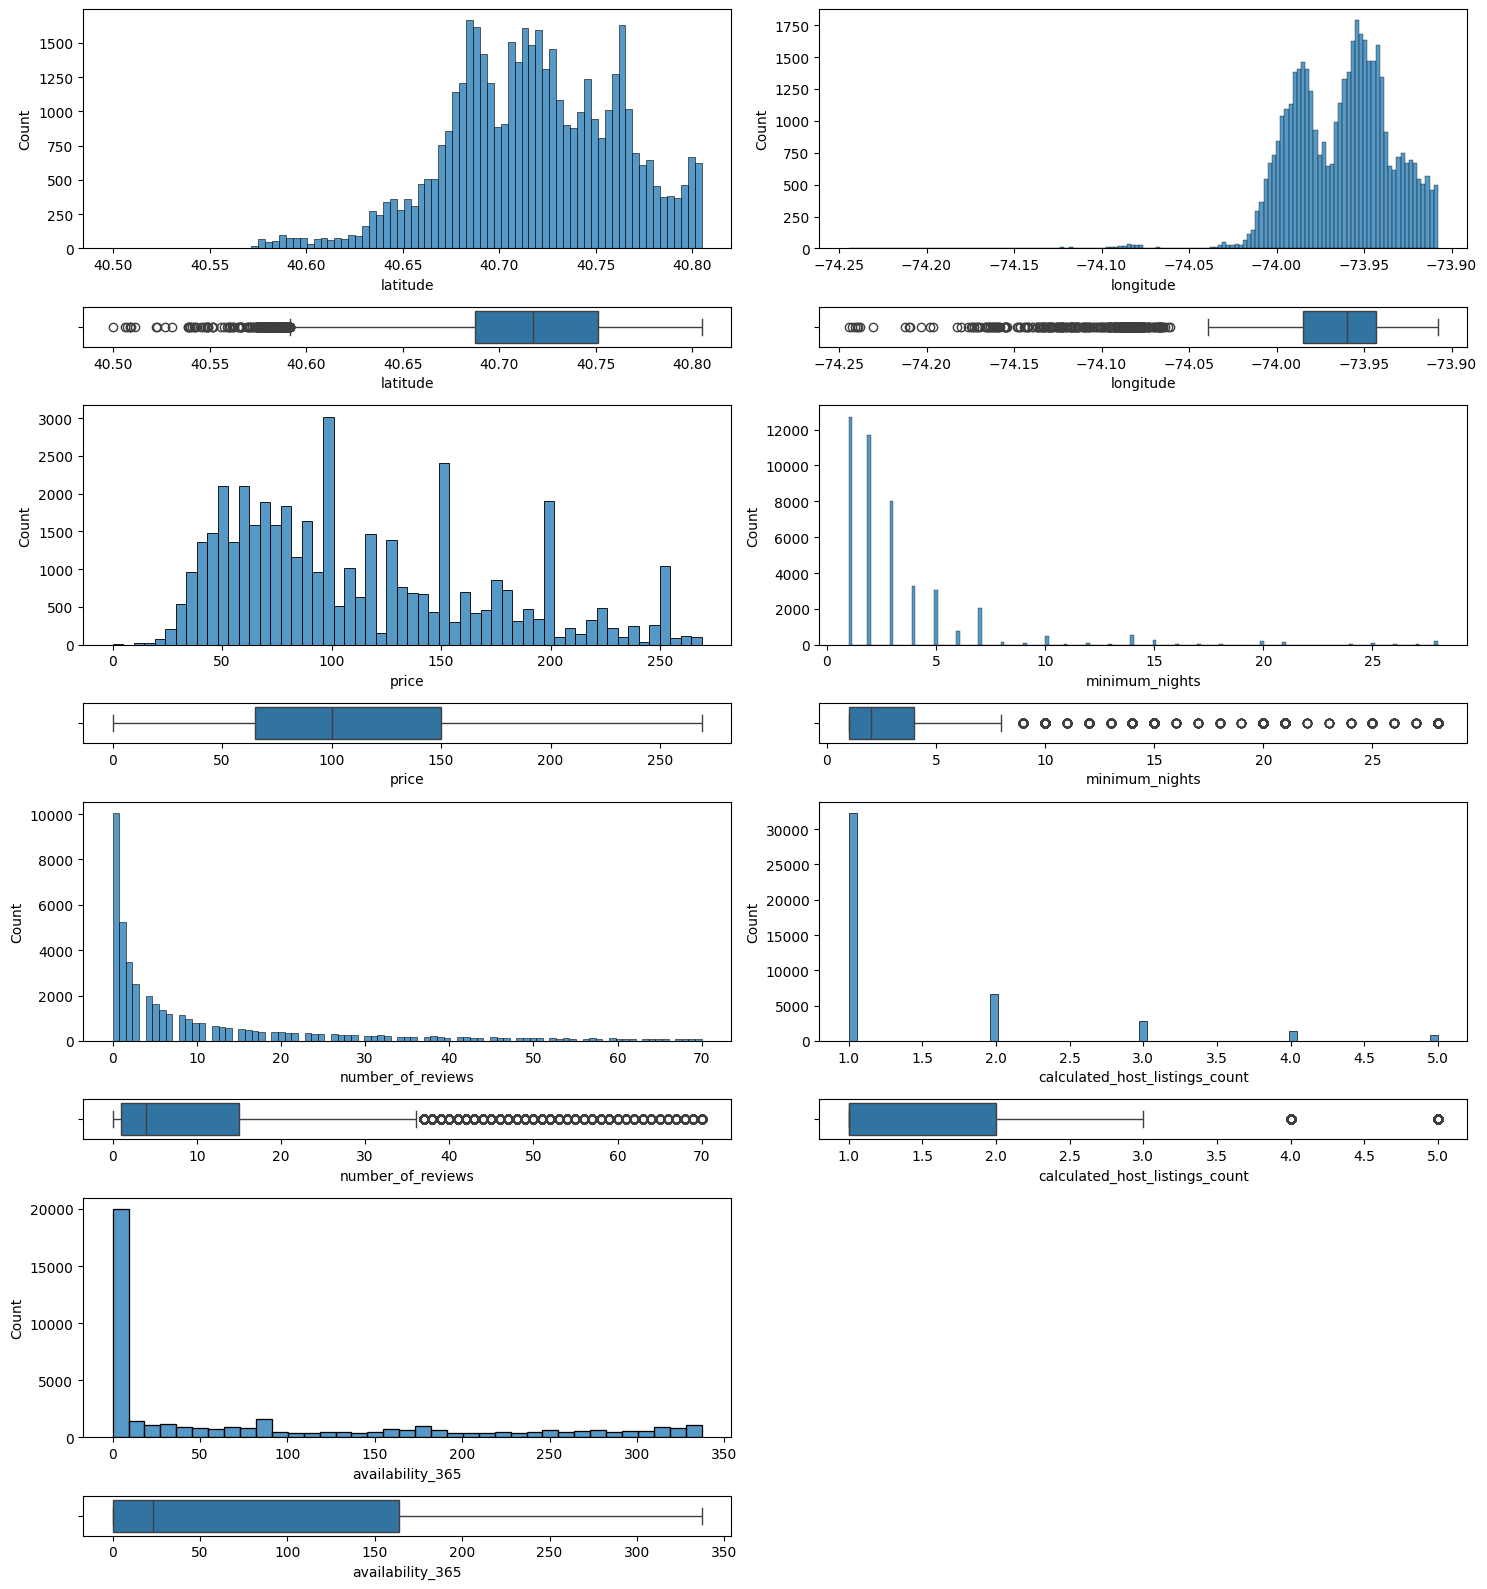

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Identificar columnas numéricas
numerical_column = [col for col in info_data.index if info_data[col] == "int64" or info_data[col] == "float64"]

n = len(numerical_column)
n_cols = 2
n_rows = math.ceil(n / n_cols) * 2  # Dos filas por variable para histogramas y boxplots

# Alternar alturas: filas pares grandes para historigraam e impares pequeñas para boxplot
height_ratios = []
for _ in range(n_rows // 2):
    height_ratios.extend([6, 1])
if len(height_ratios) < n_rows:
    height_ratios.append(1)  # Por si hay una fila extra

fig, axis = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows), gridspec_kw={'height_ratios': height_ratios})

# Asegurar que axis siempre sea 2D
axis = np.array(axis)
if axis.ndim == 1:
    axis = axis.reshape(-1, n_cols)


for idx, col in enumerate(numerical_column):

    #Limitar los datos a los valores por debajo del percentil 90
    datos_filtrados = airbhb_csv[col].copy()
    limite = datos_filtrados.quantile(0.90)
    datos_filtrados = datos_filtrados[datos_filtrados <= limite]

    # Calcular la posición en la cuadrícula
    grid_pos = idx // n_cols
    col_pos = idx % n_cols
    row_hist = grid_pos * 2
    row_box = row_hist + 1

    sns.histplot(ax=axis[row_hist, col_pos], data=datos_filtrados.to_frame(), x=datos_filtrados.name)
    sns.boxplot(ax=axis[row_box, col_pos], data=datos_filtrados.to_frame(), x=datos_filtrados.name)


# Ocultar subplots vacíos (Esto sirve si hay un número impar a revisar)
for idx in range(n, (n_rows // 2) * n_cols):
    grid_pos = idx // n_cols
    col_pos = idx % n_cols
    row_hist = grid_pos * 2
    row_box = row_hist + 1
    fig.delaxes(axis[row_hist, col_pos])
    fig.delaxes(axis[row_box, col_pos])

plt.tight_layout()
plt.show()

**Análisis de variables multivariante**

In [75]:
def plot_numerical_analisis(column, numerical_column, name = None, column_info = False):
    
    if name is None:
        name = column

    columna_n = f"{column}_n"
    df_plot = airbhb_csv.copy()
    df_plot[columna_n] = pd.factorize(df_plot[column])[0]

    if column_info:
        print(df_plot[[columna_n, column]].drop_duplicates())

    n = len(numerical_column)
    n_cols = 2
    n_rows = math.ceil(n / n_cols) * 2

    fig, axis = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows))

    axis = np.array(axis)
    if axis.ndim == 1:
        axis = axis.reshape(-1, n_cols)

    for idx, col in enumerate(numerical_column):
        limite = df_plot[col].quantile(0.90)
        datos_filtrados = df_plot[df_plot[col] <= limite]

        grid_pos = idx // n_cols
        col_pos = idx % n_cols
        row_hist = grid_pos * 2
        row_box = row_hist + 1

        sns.regplot(ax=axis[row_hist, col_pos], data=datos_filtrados, x=col, y=columna_n).set(ylabel=name)
        sns.heatmap(
            datos_filtrados[[col, columna_n]].corr()
            .rename(columns={columna_n: name}, index={columna_n: name}),
            annot=True, fmt=".2f", ax=axis[row_box, col_pos], cbar=False)
        

    for idx in range(n, (n_rows // 2) * n_cols):
        grid_pos = idx // n_cols
        col_pos = idx % n_cols
        row_hist = grid_pos * 2
        row_box = row_hist + 1
        fig.delaxes(axis[row_hist, col_pos])
        fig.delaxes(axis[row_box, col_pos])

    plt.tight_layout()
    plt.show()


* Tipo de cuarto - (variables numericas)

    room_type_n        room_type
0             0     Private room
1             1  Entire home/apt
39            2      Shared room


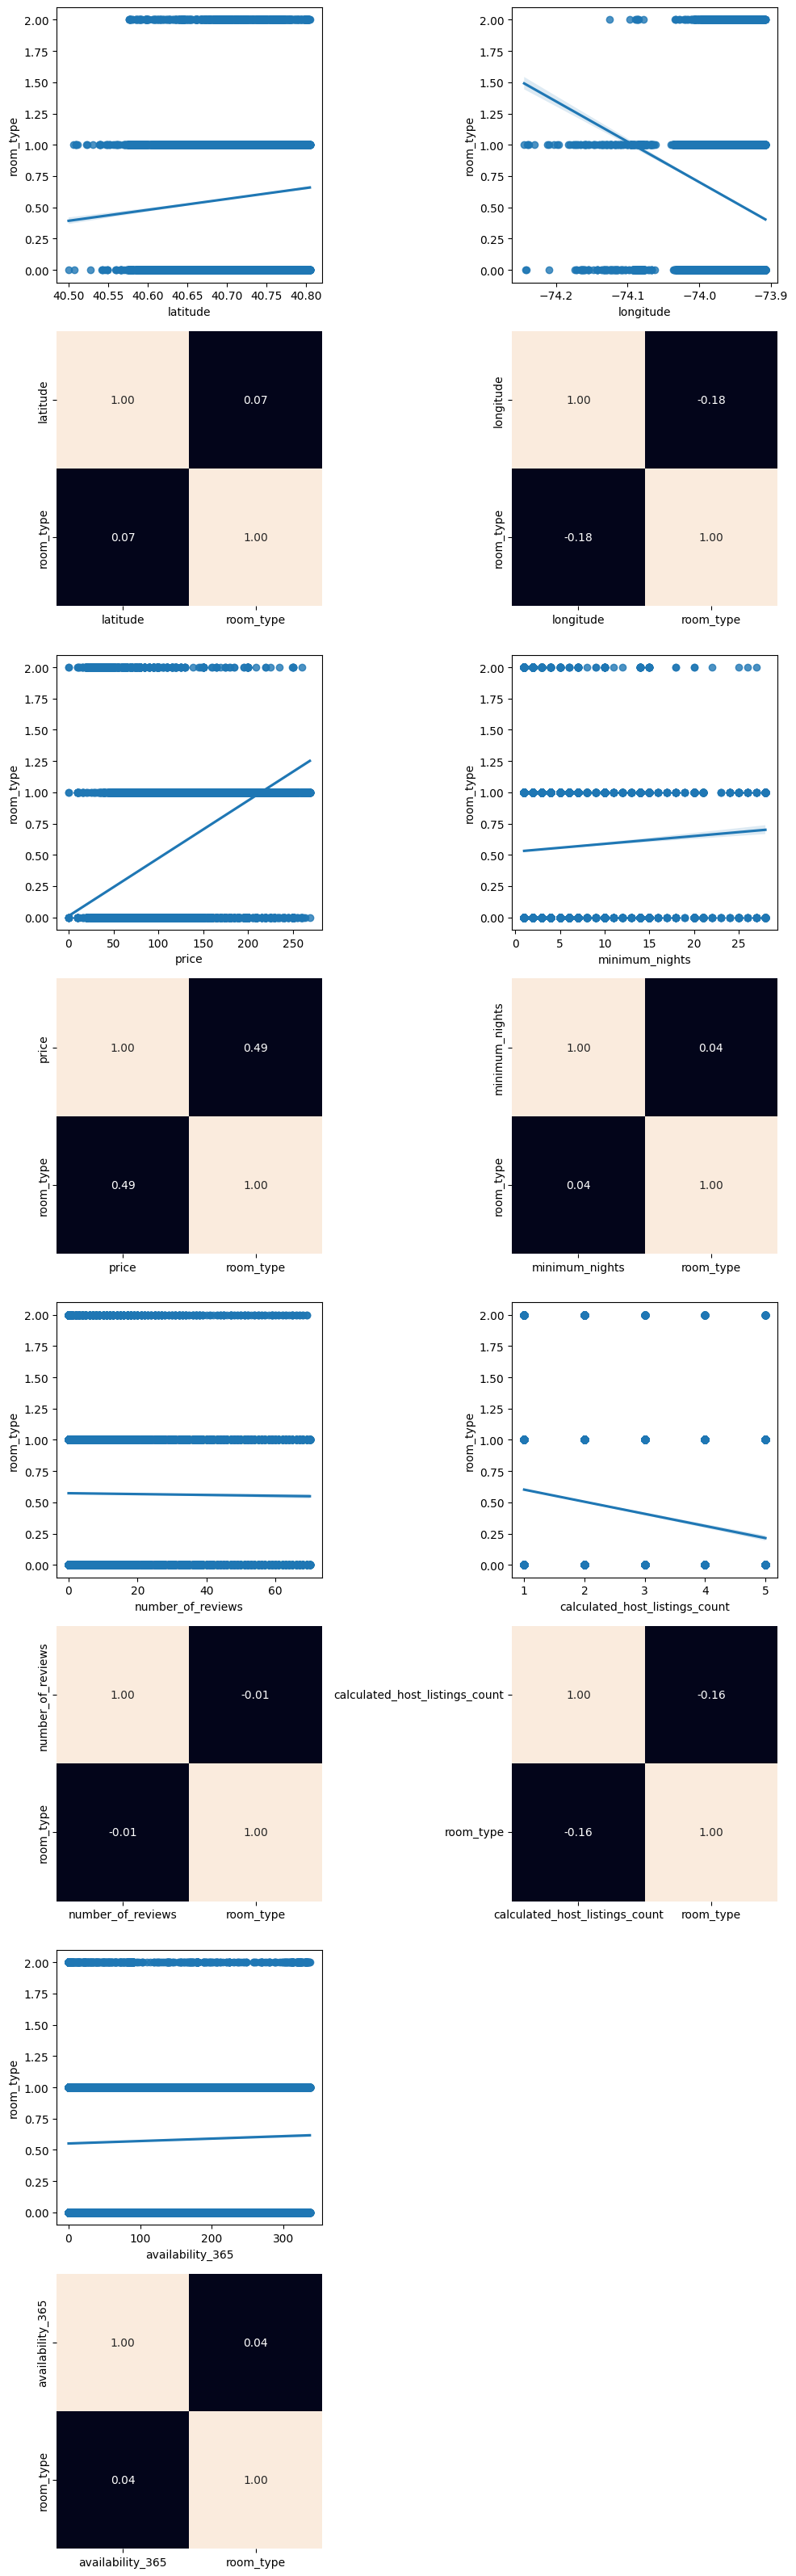

In [76]:
plot_numerical_analisis("room_type", numerical_column, column_info=True)

Parece que hay una relación media entre el precio (price) y el tipo de cuarto (room_type). Las casas o departamentos enteros son los que tiene n los precios promedio mas altos, debe ser por el tamaño de la propiedad. Los cuartos privados tienen precios mas equilibrados y finalmente las habiraciones compartidas son las que parecen tener precios mas baratos.

**Minimo de noches - disponibilidad 365**

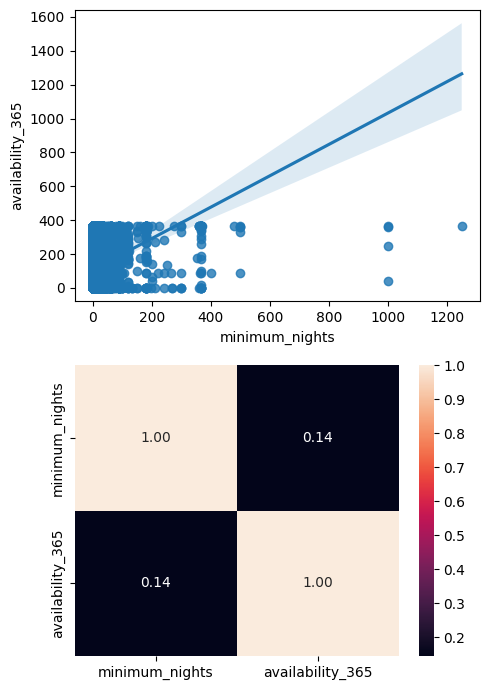

In [82]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = airbhb_csv, x = "minimum_nights", y = "availability_365")
sns.heatmap(airbhb_csv[["minimum_nights", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

**Cuenta de host - numero de vistas**

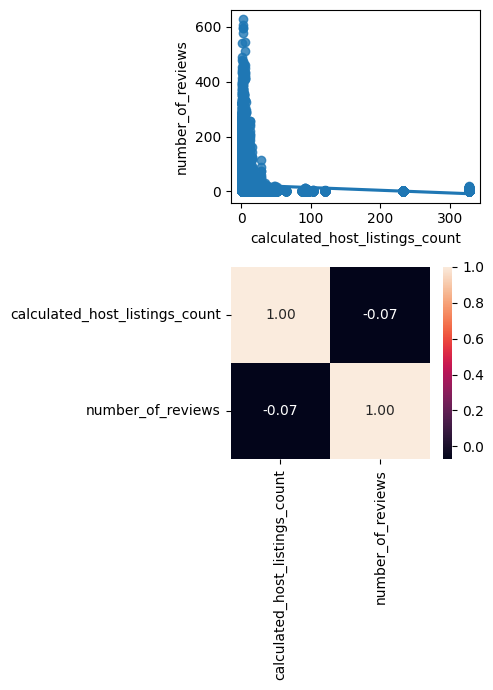

In [83]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = airbhb_csv, x = "calculated_host_listings_count", y = "number_of_reviews")
sns.heatmap(airbhb_csv[["calculated_host_listings_count", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Parece no haber relación entre variables numericas

**Análisis categórico-categórico**

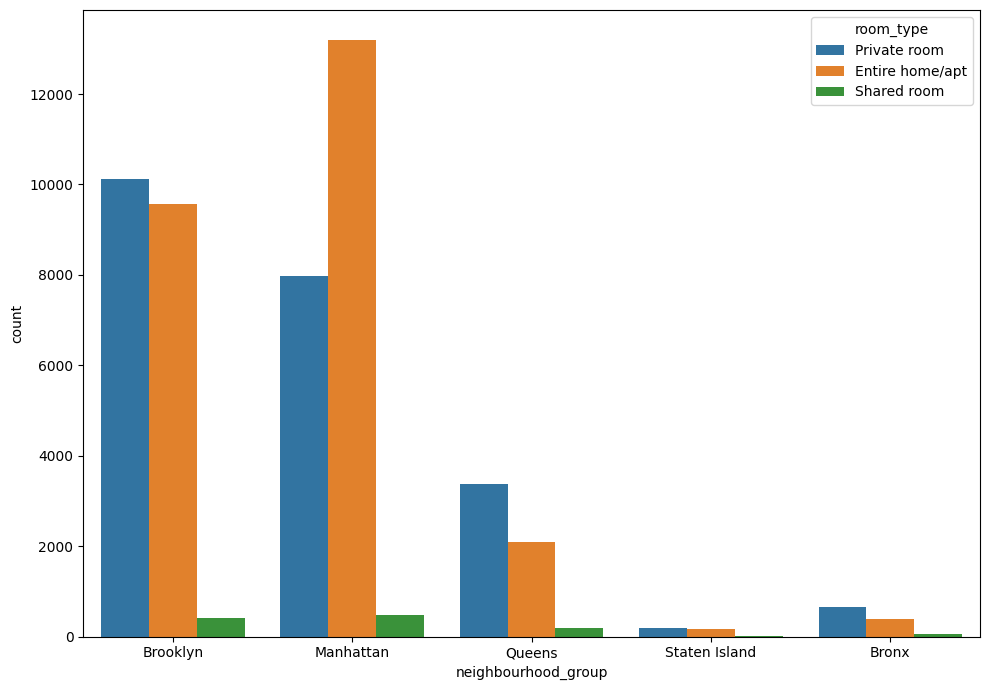

In [91]:
fig, axis = plt.subplots(1, 1, figsize=(10, 7))

sns.countplot(ax=axis, data=airbhb_csv, x="neighbourhood_group", hue="room_type")

plt.tight_layout()
plt.show()

plt.show()

* Manhattan es el sitio con mayores pisos/casas enteras de airbnb, es posible que haya mas posibilidad de que se pueda rentar casas enteras ahi en relación a otros grupos.
* El grupo con menos tipos de vivienda es el de Staten Island
* Brooklyn es el lugar con mayor equidad entre cuartos privados y pisos/casas enteras, lo que demuestra que hay mas distribución de aparttamentos en la zona

**Combinación de clases predictoras**

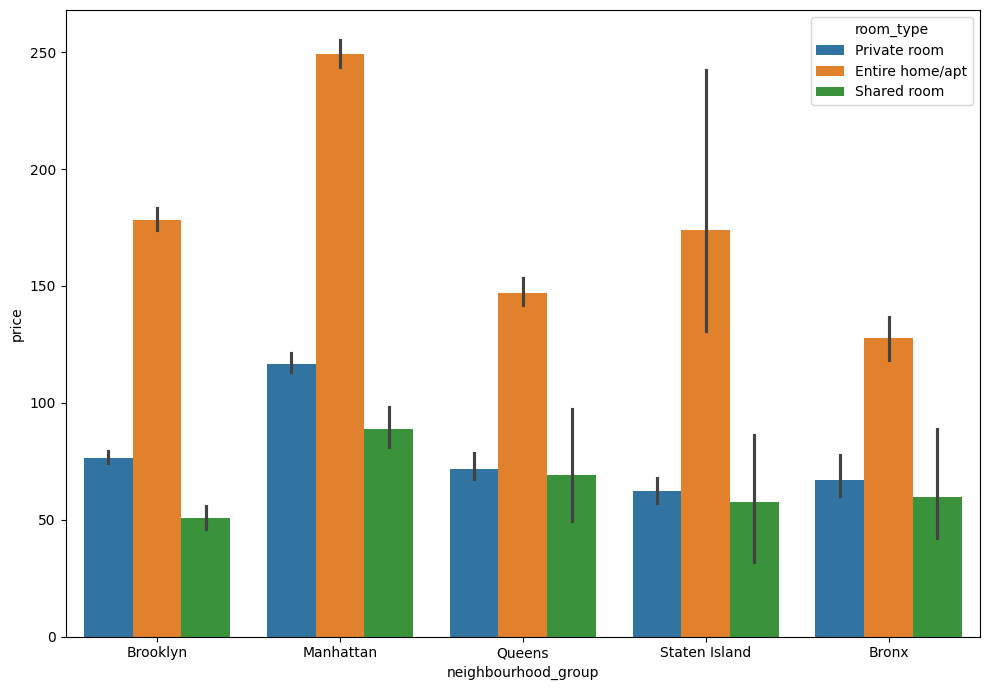

In [96]:
fig, axis = plt.subplots(1, 1, figsize=(10, 7))

sns.barplot(ax=axis, data = airbhb_csv, x = "neighbourhood_group", y = "price", hue = "room_type")

plt.tight_layout()

plt.show()

* Manhattan tiene los precios mas altos, sobre todo para pisos/casas enteras con una media de 250$
* Brooklyn y Staten Island tienen precios similares para pisos/casas enteros (aprox 175$), pero Staten Island muestra una gran variedad de precios.
* Hay pocos cuartos compartidos a pesar de ser mas baratos
* Los cuartos privadas tienen precios más uniformes entre los vecindarios, con valores entre $60 y $120.